In [73]:
import sys,tweepy,csv,re
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np


In [74]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [75]:
consumerKey = 'ENTER YOUR CONSUMER KEY'
consumerSecret = 'ENTER YOUR CONSUMER SECRET KEY'
accessToken = 'ENTER YOUR ACCESS TOKEN KEY'
accessTokenSecret = 'ENTER YOUR ACCESS TOKEN SECRET KEY'

## Create the authentication object
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

auth.set_access_token(accessToken, accessTokenSecret)

# create the API oject while passing in the auth information
api = tweepy.API(auth,wait_on_rate_limit = True)

In [91]:
# The term person wants to search
searchT= input("Enter Keyword/Tag to search about: ")

# the total number of term
count = int(input("Enter how many tweets to search: "))

posts = api.user_timeline(screen_name = searchT,count = count, lang = 'en', tweet_mode = 'extended')

# # last 5 tweets
# print("last 10 tweets: \n")
# i= 1
# for tweet in posts[0:10]:
#     print(str(i) + ') ' + tweet.full_text + '\n')
#     i= i+1


Enter Keyword/Tag to search about: elon
Enter how many tweets to search: 20


In [92]:
# Creating a dataframe with a column called tweets

df = pd.DataFrame([tweet.full_text for tweet in posts] , columns=['Tweets'])

# Show the first 5 rows of data
df.head()

,Tweets
0,"RT @AOC: During the Obama admin, folks thought..."
1,@aceckhouse If Americans knew how much better ...
2,@whstancil Paper seems to draw no distinction ...
3,RT @drvolts: The actual conservative movement ...
4,RT @koush: Difficult to quantify what an ecolo...


In [93]:
# Clean the tweet

# Create a function to clean the tweets
# r tells the python that it is a raw string

def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text) # Removes the @mentions
    text = re.sub(r'#', '', text) # Removing the hashtag
    text = re.sub(r'RT[\S]+', '', text) # removing Retweeting
    text = re.sub(r'https?:\/\/\S+', '', text) # remove the hyperlink
    
    return text

# Cleaning the  text
df['Tweets']=df['Tweets'].apply(cleanTxt)

# Showing the text
df

,Tweets
0,"RT : During the Obama admin, folks thought we’..."
1,If Americans knew how much better a society c...
2,Paper seems to draw no distinction between el...
3,RT : The actual conservative movement &amp; th...
4,RT : Difficult to quantify what an ecological ...
5,RT : We’ve been granted a brief reprieve in wh...
6,RT : Sinema and Manchin want Dems to go into n...
7,RT : The Senate parliamentarian issues an advi...
8,RT : I’m sorry—an unelected parliamentarian do...
9,RT : Abolish the filibuster.\n\nReplace the pa...


In [94]:
## Creating Function  Subjectivity - It means how much of the subjective or opinionated the subject is.  

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## Polarity - means how much positive or negative the text is

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Making new columns 

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Tweets'].apply(getPolarity)

df



,Tweets,Subjectivity,Polarity
0,"RT : During the Obama admin, folks thought we’...",1.000000,0.500000
1,If Americans knew how much better a society c...,0.650000,-0.100000
2,Paper seems to draw no distinction between el...,0.439048,0.246667
3,RT : The actual conservative movement &amp; th...,0.400000,-0.012500
4,RT : Difficult to quantify what an ecological ...,0.800000,-0.050000
5,RT : We’ve been granted a brief reprieve in wh...,0.333333,0.000000
6,RT : Sinema and Manchin want Dems to go into n...,0.000000,0.000000
7,RT : The Senate parliamentarian issues an advi...,0.000000,0.000000
8,RT : I’m sorry—an unelected parliamentarian do...,0.000000,0.000000
9,RT : Abolish the filibuster.\n\nReplace the pa...,0.000000,0.000000


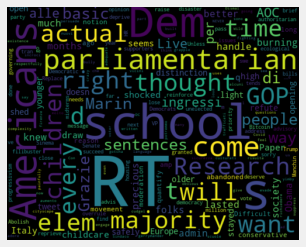

In [95]:
# Ploting Word cloud

allwords = ' '.join([twts for twts in df['Tweets']])

wordCloud = WordCloud(width = 500, height=400, random_state =21, max_font_size =120).generate(allwords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [96]:
## Create to compute negative, positive and neutral 

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score>0:
        return 'Positive'
    else:
        return 'Neutral'
    
# Creating new column
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df


,Tweets,Subjectivity,Polarity,Analysis
0,"RT : During the Obama admin, folks thought we’...",1.000000,0.500000,Positive
1,If Americans knew how much better a society c...,0.650000,-0.100000,Negative
2,Paper seems to draw no distinction between el...,0.439048,0.246667,Positive
3,RT : The actual conservative movement &amp; th...,0.400000,-0.012500,Negative
4,RT : Difficult to quantify what an ecological ...,0.800000,-0.050000,Negative
5,RT : We’ve been granted a brief reprieve in wh...,0.333333,0.000000,Neutral
6,RT : Sinema and Manchin want Dems to go into n...,0.000000,0.000000,Neutral
7,RT : The Senate parliamentarian issues an advi...,0.000000,0.000000,Neutral
8,RT : I’m sorry—an unelected parliamentarian do...,0.000000,0.000000,Neutral
9,RT : Abolish the filibuster.\n\nReplace the pa...,0.000000,0.000000,Neutral


In [97]:
### Creating a CSV FILE with the help of pandas lib
df.to_csv('RESULT.csv')

In [98]:
## Creating a new CSV File from the exisiting RESULT.csv for a more cleaner look 

with open('RESULT.csv','r',encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    
    with open('Final.csv','w',encoding='utf-8') as new_file:
        
        ## printing field name
        field_names = ['Tweets','Subjectivity', 'Polarity', 'Analysis']
        
        csv_writer = csv.DictWriter(new_file, fieldnames = field_names, delimiter=';')
        csv_writer.writeheader()
        
        for line in csv_reader:
            # deleting the first column
            del line['']
            csv_writer.writerow(line)

In [99]:
## Printing all the +ve tweets 

j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j)+ ') ' + sortedDF['Tweets'][i])
        print()
        j=j+1
    


1) RT : During the Obama admin, folks thought we’d have a 60 Dem majority for a while. It lasted 4 months.

Dems are burning precious time…

2)  Paper seems to draw no distinction between elem school and high school so doesn’t refute the tweet about elem schools opening safely. Research out of Europe, where schools for younger children stayed open when schools for older children did not, will shed more light on this q.

3) RT : For progressivism to succeed, it needs to address the basics of people's lives. It doesn't get more basic than housing, tran…

4) __G   It’s not even that there are any gotcha questions, it’s that when you see her sentences and thoughts written out, it’s painfully obvious she uses language to evade, cudgel and bully, not to grapple with complexity, engage respectfully and persuade. Dismal.

5) Wild to think how many Marin culturati adore this cityscape, every part of which would NEVER get built in Marin! yimby all the way from firenze    

6)  Do you know about 

In [100]:
#### Negative tweets
j = 1
sorteDF = df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sorteDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+ ') ' + sortedDF['Tweets'][i])
        print()
        j=j+1
    

1)  If Americans knew how much better a society can handle childcare (like they do here in Italy), they’d be shocked.

2) RT : The actual conservative movement &amp; the actual GOP abandoned moderation a long time ago. The only reason there's any notion of…

3) RT : Difficult to quantify what an ecological disaster Bitcoin is, but this comes close. 

4) RT : Just want to say this out loud, as I feel like I'm going crazy: in DC right now, Dems are fighting to give Americans adequate…



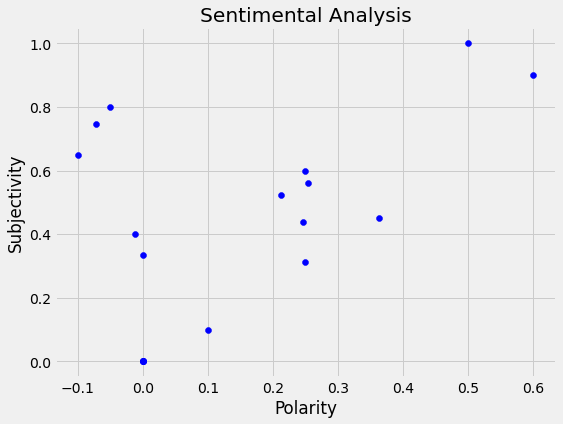

In [101]:
# Plotting Polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
    
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [102]:
# Percentage of tweets

ptweets = df[df['Analysis']=='Positive']
ptweets = ptweets['Tweets']
print(ptweets)
round( (ptweets.shape[0]/df.shape[0])*100 ,1)

0     RT : During the Obama admin, folks thought we’...
2      Paper seems to draw no distinction between el...
10    RT : For progressivism to succeed, it needs to...
12    __G   It’s not even that there are any gotcha ...
14    Wild to think how many Marin culturati adore t...
16     Do you know about Karin Sigloch’s amazing res...
17    RT : People really twist themselves into knots...
18    This firsthand account of the assault on the C...
19    RT : Good lord, watching AOC talk is like phas...
Name: Tweets, dtype: object


45.0

In [103]:
ptweets = df[df['Analysis']=='Negative']
ptweets = ptweets['Tweets']
print(ptweets)
round( (ptweets.shape[0]/df.shape[0])*100 ,1)

1      If Americans knew how much better a society c...
3     RT : The actual conservative movement &amp; th...
4     RT : Difficult to quantify what an ecological ...
13    RT : Just want to say this out loud, as I feel...
Name: Tweets, dtype: object


20.0

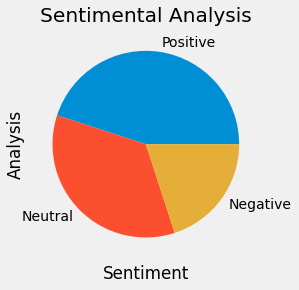

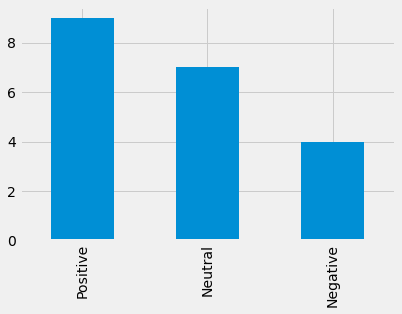

In [105]:
## Value of counts

df['Analysis'].value_counts()

plt.title("Sentimental Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind='pie')
plt.show()
df['Analysis'].value_counts().plot(kind='bar')

plt.show()